<a href="https://colab.research.google.com/github/Inn0cent-Zer0/AI_detection_phishing_mails/blob/main/AI_phishphing_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Detection of AI- generated phishing emails using NLP and behavioral features***


***Problem***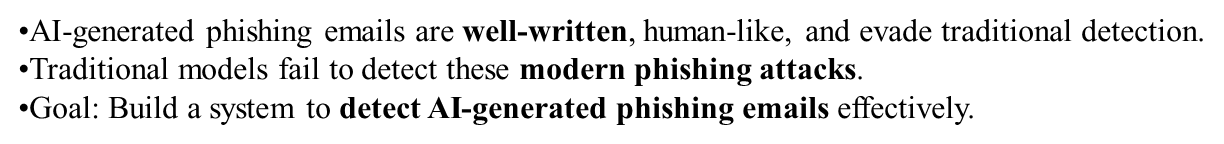

***Objective***
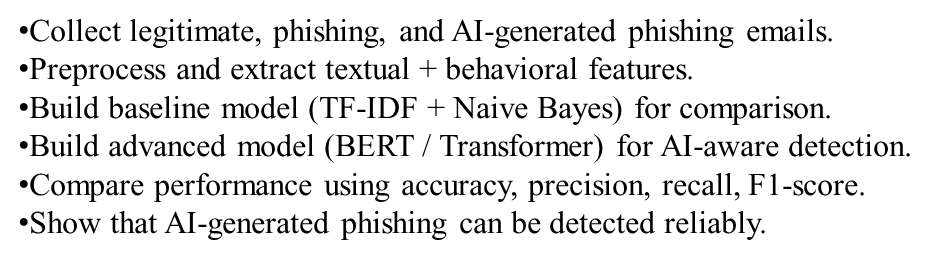

***Import Libraries***

In [ ]:
# ==============================
# STEP 0: Import Required Libraries
# ==============================

# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text processing
import re
from bs4 import BeautifulSoup

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

import warnings
warnings.filterwarnings("ignore")


In [ ]:
import kagglehub
import os

path = kagglehub.dataset_download(
    "naserabdullahalam/phishing-email-dataset")

print("Dataset downloaded to:", path)

# List files inside the downloaded path
print("\nFiles inside the dataset path:")
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

Using Colab cache for faster access to the 'phishing-email-dataset' dataset.
Dataset downloaded to: /kaggle/input/phishing-email-dataset

Files inside the dataset path:
/kaggle/input/phishing-email-dataset/SpamAssasin.csv
/kaggle/input/phishing-email-dataset/Nazario.csv
/kaggle/input/phishing-email-dataset/Nigerian_Fraud.csv
/kaggle/input/phishing-email-dataset/CEAS_08.csv
/kaggle/input/phishing-email-dataset/Enron.csv
/kaggle/input/phishing-email-dataset/Ling.csv
/kaggle/input/phishing-email-dataset/phishing_email.csv


In [ ]:
import pandas as pd

df_spamassassin = pd.read_csv(f"{path}/SpamAssasin.csv")
df_nazario      = pd.read_csv(f"{path}/Nazario.csv")
df_nigerian     = pd.read_csv(f"{path}/Nigerian_Fraud.csv")
df_ceas         = pd.read_csv(f"{path}/CEAS_08.csv")
df_enron        = pd.read_csv(f"{path}/Enron.csv")
df_ling         = pd.read_csv(f"{path}/Ling.csv")
df_phishing     = pd.read_csv(f"{path}/phishing_email.csv")

***Read the Top Dats rows in each dataset***

In [ ]:
df_spamassassin.head()

,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1


In [ ]:
df_nazario.head()

,sender,receiver,date,subject,body,urls,label
0,Mail System Internal Data <MAILER-DAEMON@monke...,NaN,28 Sep 2017 09:57:25 -0400,DON'T DELETE THIS MESSAGE -- FOLDER INTERNAL DATA,This text is part of the internal format of yo...,1,1
1,cPanel <service@cpanel.com>,jose@monkey.org,"Fri, 30 Oct 2015 00:00:48 -0500",Verify Your Account,Business with \t\t\t\t\t\t\t\tcPanel & WHM \t...,1,1
2,Microsoft Outlook <recepcao@unimedceara.com.br>,NaN,"Fri, 30 Oct 2015 06:21:59 -0300 (BRT)",Helpdesk Mailbox Alert!!!,Your two incoming mails were placed on pending...,1,1
3,Ann Garcia <AnGarcia@mcoe.org>,"""info@maaaaa.org"" <info@maaaaa.org>","Fri, 30 Oct 2015 14:54:33 +0000",IT-Service Help Desk,Password will expire in 3 days. Click Here To ...,0,1
4,"""USAA"" <usaaacctupdate@sccu4u.com>",Recipients <usaaacctupdate@sccu4u.com>,"Fri, 30 Oct 2015 14:02:33 -0500",Final USAA Reminder - Update Your Account Now,"To ensure delivery to your inbox, please add U...",1,1


In [ ]:
df_nigerian.head()

,sender,receiver,date,subject,body,urls,label
0,MR. JAMES NGOLA. <james_ngola2002@maktoob.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 02:38:20 +0000",URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,0,1
1,Mr. Ben Suleman <bensul2004nng@spinfinder.com>,R@M,"Thu, 31 Oct 2002 05:10:00 -0000",URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",0,1
2,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:17:55 +0100",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
3,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:44:20 -0000",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
4,Maryam Abacha <m_abacha03@www.com>,R@M,"Fri, 01 Nov 2002 01:45:04 +0100",I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope...",0,1


In [ ]:
df_ceas.head()

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [ ]:
df_enron.head()

,subject,body,label
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- h...,0
1,re : nom / actual vols for 24 th,- - - - - - - - - - - - - - - - - - - - - - fo...,0
2,"enron actuals for march 30 - april 1 , 201","estimated actuals\r\nmarch 30 , 2001\r\nno flo...",0
3,"hpl nom for may 30 , 2001",( see attached file : hplno 530 . xls )\r\n- h...,0
4,"hpl nom for june 1 , 2001",( see attached file : hplno 601 . xls )\r\n- h...,0


In [ ]:
df_ling.head()

,subject,body,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [ ]:
df_phishing.head()

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


***Standardize All Dataset***

In [ ]:
df_spamassassin_processed = df_spamassassin.copy()
# Fill NaN values in 'subject' and 'body' with empty strings before concatenation
df_spamassassin_processed['subject'] = df_spamassassin_processed['subject'].fillna('')
df_spamassassin_processed['body'] = df_spamassassin_processed['body'].fillna('')

df_spamassassin_processed['text_combined'] = df_spamassassin_processed['subject'] + " " + df_spamassassin_processed['body']

# Select only the desired columns and rename if necessary
df_spamassassin_processed = df_spamassassin_processed[['text_combined', 'label']]

df_spamassassin_processed.head()

,text_combined,label
0,"Re: New Sequences Window Date: Wed, 21 ...",0
1,[zzzzteana] RE: Alexander Martin A posted:\nTa...,0
2,[zzzzteana] Moscow bomber Man Threatens Explos...,0
3,[IRR] Klez: The Virus That Won't Die Klez: Th...,0
4,Re: [zzzzteana] Nothing like mama used to make...,0


In [ ]:
df_nazario_processed = df_nazario.copy()
df_nazario_processed['subject'] = df_nazario_processed['subject'].fillna('')
df_nazario_processed['body'] = df_nazario_processed['body'].fillna('')

df_nazario_processed['text_combined'] = df_nazario_processed['subject'] + " " + df_nazario_processed['body']
df_nazario_processed = df_nazario_processed[['text_combined', 'label']]

df_nazario_processed.head()

,text_combined,label
0,DON'T DELETE THIS MESSAGE -- FOLDER INTERNAL D...,1
1,Verify Your Account Business with \t\t\t\t\t\...,1
2,Helpdesk Mailbox Alert!!! Your two incoming ma...,1
3,IT-Service Help Desk Password will expire in 3...,1
4,Final USAA Reminder - Update Your Account Now ...,1


In [ ]:
df_nigerian_processed = df_nigerian.copy()
df_nigerian_processed['subject'] = df_nigerian_processed['subject'].fillna('')
df_nigerian_processed['body'] = df_nigerian_processed['body'].fillna('')

df_nigerian_processed['text_combined'] = df_nigerian_processed['subject'] + " " + df_nigerian_processed['body']
df_nigerian_processed = df_nigerian_processed[['text_combined', 'label']]

df_nigerian_processed.head()

,text_combined,label
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP FRO...,1
1,URGENT ASSISTANCE /RELATIONSHIP (P) Dear Frien...,1
2,GOOD DAY TO YOU FROM HIS ROYAL MAJESTY (HRM) C...,1
3,GOOD DAY TO YOU FROM HIS ROYAL MAJESTY (HRM) C...,1
4,"I Need Your Assistance. Dear sir, \n \nIt is w...",1


In [ ]:
df_ceas_processed = df_ceas.copy()
df_ceas_processed['subject'] = df_ceas_processed['subject'].fillna('')
df_ceas_processed['body'] = df_ceas_processed['body'].fillna('')

df_ceas_processed['text_combined'] = df_ceas_processed['subject'] + " " + df_ceas_processed['body']
df_ceas_processed = df_ceas_processed[['text_combined', 'label']]

df_ceas_processed.head()

,text_combined,label
0,"Never agree to be a loser Buck up, your troubl...",1
1,Befriend Jenna Jameson \nUpgrade your sex and ...,1
2,CNN.com Daily Top 10 >+=+=+=+=+=+=+=+=+=+=+=+=...,1
3,Re: svn commit: r619753 - in /spamassassin/tru...,0
4,SpecialPricesPharmMoreinfo \nWelcomeFastShippi...,1


In [ ]:
df_enron_processed = df_enron.copy()
df_enron_processed['subject'] = df_enron_processed['subject'].fillna('')
df_enron_processed['body'] = df_enron_processed['body'].fillna('')

df_enron_processed['text_combined'] = df_enron_processed['subject'] + " " + df_enron_processed['body']
df_enron_processed = df_enron_processed[['text_combined', 'label']]

df_enron_processed.head()

,text_combined,label
0,"hpl nom for may 25 , 2001 ( see attached file ...",0
1,re : nom / actual vols for 24 th - - - - - - -...,0
2,"enron actuals for march 30 - april 1 , 201 est...",0
3,"hpl nom for may 30 , 2001 ( see attached file ...",0
4,"hpl nom for june 1 , 2001 ( see attached file ...",0


In [ ]:
df_ling_processed = df_ling.copy()
df_ling_processed['subject'] = df_ling_processed['subject'].fillna('')
df_ling_processed['body'] = df_ling_processed['body'].fillna('')

df_ling_processed['text_combined'] = df_ling_processed['subject'] + " " + df_ling_processed['body']
df_ling_processed = df_ling_processed[['text_combined', 'label']]

df_ling_processed.head()

,text_combined,label
0,job posting - apple-iss research center conten...,0
1,"lang classification grimes , joseph e . and b...",0
2,query : letter frequencies for text identifica...,0
3,risk a colleague and i are researching the dif...,0
4,request book information earlier this morning ...,0


***Combine Multiple Datasets into One huge Dataset***

In [ ]:
# Combine all processed dataframes into a single dataframe
df_combined = pd.concat([
    df_spamassassin_processed,
    df_nazario_processed,
    df_nigerian_processed,
    df_ceas_processed,
    df_enron_processed,
    df_ling_processed,
    df_phishing # df_phishing already has 'text_combined' and 'label' columns
])

# Display the head and shape of the combined dataframe
print(f"Shape of combined DataFrame: {df_combined.shape}")
display(df_combined.head())

Shape of combined DataFrame: (164972, 2)


,text_combined,label
0,"Re: New Sequences Window Date: Wed, 21 ...",0
1,[zzzzteana] RE: Alexander Martin A posted:\nTa...,0
2,[zzzzteana] Moscow bomber Man Threatens Explos...,0
3,[IRR] Klez: The Virus That Won't Die Klez: Th...,0
4,Re: [zzzzteana] Nothing like mama used to make...,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('text_combined').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text_combined')):
  _plot_series(series, series_name, i)
  fig.legend(title='text_combined', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text_combined')):
  _plot_series(series, series_name, i)
  fig.legend(title='text_combined', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['text_combined'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='index', y='text_combined', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

The ***df_combined DataFrame*** has been successfully created. It contains **164,972 rows and 2 columns (text_combined and label)**. The first few rows show the combined text from the subject and body, along with their respective labels **(0 for legitimate, 1 for phishing/spam)**.

In [31]:
df_combined.head()

,text_combined,label
0,"Re: New Sequences Window Date: Wed, 21 ...",0
1,[zzzzteana] RE: Alexander Martin A posted:\nTa...,0
2,[zzzzteana] Moscow bomber Man Threatens Explos...,0
3,[IRR] Klez: The Virus That Won't Die Klez: Th...,0
4,Re: [zzzzteana] Nothing like mama used to make...,0


In [33]:
df_combined.isnull().sum()

,0
text_combined,0
label,0


In [36]:
#Dropping duplicate and null values
df_combined.dropna(inplace=True,axis=0)
df_combined.drop_duplicates(inplace=True)

In [37]:
print("Dimension of the row data:",df_combined.shape)

Dimension of the row data: (164552, 2)


In [39]:
import plotly.express as px

# Assuming df_combined is your DataFrame with 'label' column
label_counts = df_combined['label'].value_counts()

fig = px.bar(x=label_counts.index.astype(str), y=label_counts.values,
             color=label_counts.index.astype(str),
             color_discrete_map={'0': 'blue', '1': 'red'},
             labels={'x': 'Category (0: Legitimate, 1: Phishing/Spam)', 'y': 'Count'},
             title='Categorical Distribution of Email Labels')

# Show the plot
fig.show()

The output does not have a significant class imbalance. The distribution of labels is quite balanced:


**Label 1 (Phishing/Spam)**: 85,729 entries (approximately 52.1%)

**Label 0 (Legitimate)**: 78,823 entries (approximately 47.9%)

This small difference is generally not considered a severe imbalance and should not heavily impact model training.